In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)
X=np.linspace(0, 1, 100).reshape(-1, 1)
y=np.sin(2*np.pi*X)+np.random.randn(100, 1)*0.2

X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [3]:
degrees=range(1, 16)
train_errors, test_errors=[], []

for d in degrees:
    poly=PolynomialFeatures(degree=d)
    X_train_poly=poly.fit_transform(X_train)
    X_test_poly=poly.transform(X_test)

    model=LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred=model.predict(X_train_poly)
    y_test_pred=model.predict(X_test_poly)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

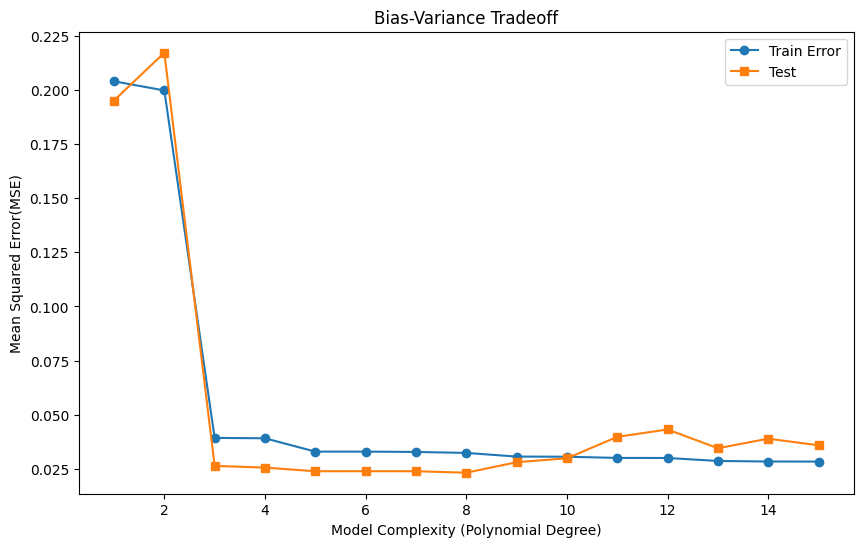

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label="Train Error", marker='o')
plt.plot(degrees, test_errors, label="Test", marker='s')
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Mean Squared Error(MSE)")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.show()

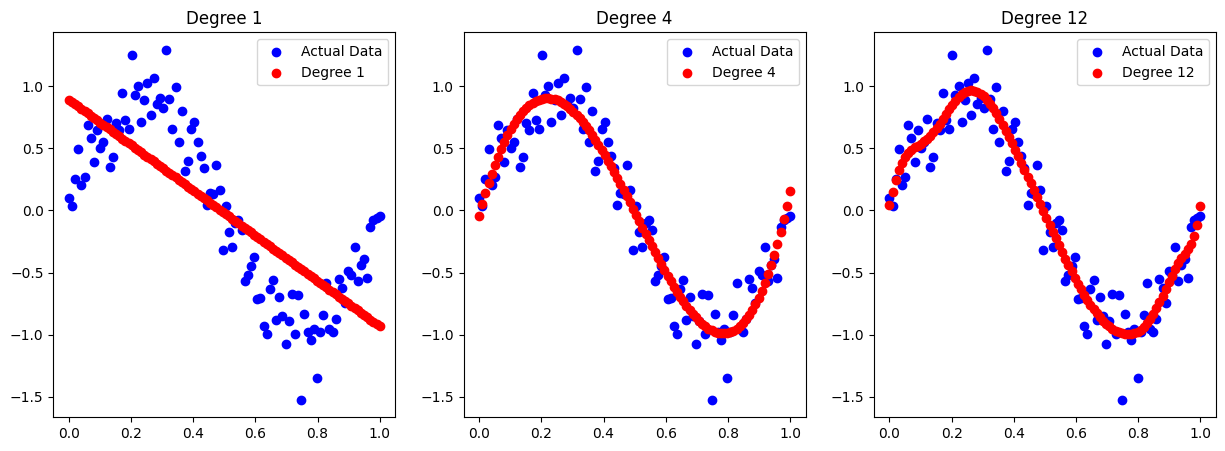

In [6]:
plt.figure(figsize=(15,5))

for i, degree in enumerate([1, 4, 12], 1):
    poly=PolynomialFeatures(degree)
    X_poly=poly.fit_transform(X)
    model=LinearRegression()
    model.fit(X_poly, y)
    y_pred=model.predict(X_poly)

    plt.subplot(1, 3, i)
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.scatter(X, y_pred, color='red', label=f'Degree {degree}')
    plt.title(f"Degree {degree}")
    plt.legend()

plt.show()